### 1. Import data and libraries

In [0]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
pd.set_option('display.max_columns', None)

In [2]:
drive.mount('/content/drive',force_remount=True)
path ="/content/drive/My Drive/ML_templates/"

Mounted at /content/drive


In [0]:
sys.path.append('/content/drive/My Drive/ML_templates/utils')
import explore_data as ed
import evaluate_metrics as em

In [4]:
ltv_df = pd.read_csv(path+"/data/Technical exam data.csv")
print ("{} dataset has {} rows(samples) with {} columns(features) each.".format("LTV",*ltv_df.shape))
print(ltv_df.head(5))

LTV dataset has 303235 rows(samples) with 8 columns(features) each.
   POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  MAX_DURATION  \
0       97662795  01-APR-16            4  01-OCT-16        1           184   
1      100915150  01-DEC-16           12  01-DEC-16        1           180   
2       99747655  01-OCT-16           10  01-MAR-17        1           180   
3       99406855  01-SEP-16            9  01-JAN-17        1           180   
4      102166525  01-JAN-17            1  01-FEB-17        2           184   

  STATE CARRIER_NAME  
0    AZ     CARRIER2  
1    OR     CARRIER1  
2    NC     CARRIER3  
3    AK     CARRIER3  
4    AZ     CARRIER2  


In [5]:
self.dataframe=ltv_df
ltv_df_filtered[["START_DATE", "CHURN_DATE"]] = ltv_df_filtered[["START_DATE", "CHURN_DATE"]].apply(pd.to_datetime)
ltv_df_filtered["START_YEAR"]=ltv_df_filtered['START_DATE'].dt.year
ltv_df_filtered["CHURN_YEAR"]=ltv_df_filtered['CHURN_DATE'].dt.year
ltv_df_filtered["CHURN_MONTH"]=ltv_df_filtered['CHURN_DATE'].dt.month
ltv_df_filtered["MAX_BILLING_CYCLE"]=round(ltv_df_filtered['MAX_DURATION']/30).astype(int)
ltv_df_filtered["BILLING_CYCLE_1"]=ltv_df_filtered['MEMBERS']

def billing_cycle(members,cycle,max_billing_cycle):
    if cycle <= max_billing_cycle:
        return members
    else:
        return 0

ltv_df_filtered['BILLING_CYCLE_2'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,2, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_3'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,3, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_4'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,4, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_5'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,5, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_6'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,6, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_7'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,7, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_8'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,8, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_9'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,9, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_10'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,10, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_11'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,11, x.MAX_BILLING_CYCLE), axis=1)
ltv_df_filtered['BILLING_CYCLE_12'] = ltv_df_filtered.apply(lambda x: billing_cycle(x.MEMBERS,12, x.MAX_BILLING_CYCLE), axis=1)

print(ltv_df_filtered.head(5))

   POLICY_NUMBER START_DATE  START_MONTH CHURN_DATE  MEMBERS  MAX_DURATION  \
0       97662795 2016-04-01            4 2016-10-01        1           184   
1      100915150 2016-12-01           12 2016-12-01        1           180   
2       99747655 2016-10-01           10 2017-03-01        1           180   
3       99406855 2016-09-01            9 2017-01-01        1           180   
4      102166525 2017-01-01            1 2017-02-01        2           184   

  STATE CARRIER_NAME  START_YEAR  CHURN_YEAR  CHURN_MONTH  MAX_BILLING_CYCLE  \
0    AZ     CARRIER2        2016        2016           10                  6   
1    OR     CARRIER1        2016        2016           12                  6   
2    NC     CARRIER3        2016        2017            3                  6   
3    AK     CARRIER3        2016        2017            1                  6   
4    AZ     CARRIER2        2017        2017            2                  6   

   BILLING_CYCLE_1  BILLING_CYCLE_2  BILLING_CYCLE

### 7a. Preliminary Model Selection

In [0]:
ltv_df_model=ltv_df_filtered[['POLICY_NUMBER','START_MONTH','START_DATE','MEMBERS','STATE','CARRIER_NAME','MAX_BILLING_CYCLE']]


In [13]:
ltv_df_model.groupby('MAX_BILLING_CYCLE').size()


MAX_BILLING_CYCLE
1         67
2          4
3      82137
4        537
6     177990
10        40
11      7552
12     33970
36       938
dtype: int64

In [6]:
ltv_df_model=ltv_df_filtered[['POLICY_NUMBER','START_MONTH','START_DATE','MEMBERS','STATE','CARRIER_NAME','MAX_BILLING_CYCLE']]
ltv_df_model=ltv_df_model[(ltv_df_model.MAX_BILLING_CYCLE<20) & (ltv_df_model.MAX_BILLING_CYCLE!=2)]
ltv_df_model=pd.get_dummies(ltv_df_model)
ltv_df_model.describe()

,POLICY_NUMBER,START_MONTH,MEMBERS,MAX_BILLING_CYCLE,STATE_AK,STATE_AL,STATE_AR,STATE_AZ,STATE_CA,STATE_CO,STATE_CT,STATE_DC,STATE_DE,STATE_FL,STATE_GA,STATE_HI,STATE_IA,STATE_ID,STATE_IL,STATE_IN,STATE_KS,STATE_KY,STATE_LA,STATE_MD,STATE_ME,STATE_MI,STATE_MN,STATE_MO,STATE_MS,STATE_MT,STATE_NC,STATE_ND,STATE_NE,STATE_NH,STATE_NM,STATE_NV,STATE_OH,STATE_OK,STATE_OR,STATE_PA,STATE_RI,STATE_SC,STATE_SD,STATE_TN,STATE_TX,STATE_UT,STATE_VA,STATE_WA,STATE_WI,STATE_WV,STATE_WY,CARRIER_NAME_CARRIER1,CARRIER_NAME_CARRIER10,CARRIER_NAME_CARRIER11,CARRIER_NAME_CARRIER12,CARRIER_NAME_CARRIER13,CARRIER_NAME_CARRIER14,CARRIER_NAME_CARRIER2,CARRIER_NAME_CARRIER3,CARRIER_NAME_CARRIER4,CARRIER_NAME_CARRIER5,CARRIER_NAME_CARRIER6,CARRIER_NAME_CARRIER7,CARRIER_NAME_CARRIER8,CARRIER_NAME_CARRIER9
count,3.022930e+05,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000,302293.000000
mean,1.016862e+08,6.472092,1.495281,5.979887,0.004188,0.009398,0.005240,0.035026,0.077111,0.036862,0.011343,0.007900,0.003348,0.071791,0.052294,0.002838,0.008740,0.006308,0.051447,0.023325,0.012021,0.012762,0.012521,0.032472,0.004343,0.023762,0.021989,0.021304,0.006960,0.006990,0.040729,0.002028,0.007311,0.003292,0.003804,0.013834,0.039425,0.010301,0.023742,0.041579,0.000572,0.016137,0.002709,0.019551,0.109056,0.011816,0.045714,0.016742,0.023209,0.003156,0.003010,0.315968,0.007116,0.001674,0.000278,0.000245,0.000132,0.237379,0.215003,0.080435,0.056905,0.051364,0.016696,0.009550,0.007255
std,8.565315e+06,3.464492,1.014413,2.670176,0.064579,0.096488,0.072198,0.183845,0.266767,0.188422,0.105899,0.088528,0.057763,0.258142,0.222619,0.053200,0.093078,0.079175,0.220908,0.150934,0.108982,0.112248,0.111195,0.177250,0.065762,0.152306,0.146646,0.144395,0.083137,0.083313,0.197661,0.044986,0.085190,0.057277,0.061561,0.116803,0.194605,0.100971,0.152244,0.199625,0.023916,0.126001,0.051980,0.138450,0.311711,0.108059,0.208864,0.128304,0.150568,0.056089,0.054784,0.464901,0.084054,0.040879,0.016667,0.015644,0.011502,0.425477,0.410825,0.271966,0.231661,0.220740,0.128129,0.097258,0.084864
min,2.791784e+07,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.417540e+07,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
# Extract the training data
train_data =ltv_df_model[ltv_df_model.START_DATE<"2019-01-01"]
test_set_2019 = ltv_df_model[ltv_df_model.START_DATE>="2019-01-01"]
test_target_2019=test_set_2019['MAX_BILLING_CYCLE']
test_features_2019=test_set_2019.drop(columns = ['MAX_BILLING_CYCLE','POLICY_NUMBER','START_DATE'])

# Labels for training
target =train_data['MAX_BILLING_CYCLE']
features=train_data.drop(columns = ['MAX_BILLING_CYCLE','POLICY_NUMBER','START_DATE'])

In [8]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 210675 samples.
Testing set has 52669 samples.


In [0]:
from sklearn.metrics import fbeta_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
import time as t

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = t.time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = t.time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
    
        
    # TODO: Get the predictions on the test set(X_test),
    start = t.time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = t.time() # Get end time
   
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train,predictions_train)
   
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=.5,average='weighted')
       
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=.5,average='weighted')
    
    #labels = [0,1]
    #cm_train = confusion_matrix(y_train, predictions_train, labels)
    #cm_test = confusion_matrix(y_test, predictions_test, labels)
    display(learner)
    #display(cm_train)
    #display(cm_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### 7c. Preliminary Comparison

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

#clf_A = DecisionTreeClassifier(max_depth=6,min_samples_leaf =40)
clf_A = GradientBoostingClassifier()
clf_B = KNeighborsClassifier()
clf_C= RandomForestClassifier()
clf_D= XGBClassifier()
#clf_E=



# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = (samples_100//10)
samples_1 = samples_100//100


# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    #print(clf)
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
      results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)



GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GradientBoostingClassifier trained on 2106 samples.


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GradientBoostingClassifier trained on 21067 samples.


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

GradientBoostingClassifier trained on 210675 samples.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier trained on 2106 samples.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier trained on 21067 samples.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier trained on 210675 samples.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier trained on 2106 samples.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier trained on 21067 samples.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier trained on 210675 samples.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier trained on 2106 samples.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier trained on 21067 samples.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBClassifier trained on 210675 samples.


NameError: ignored

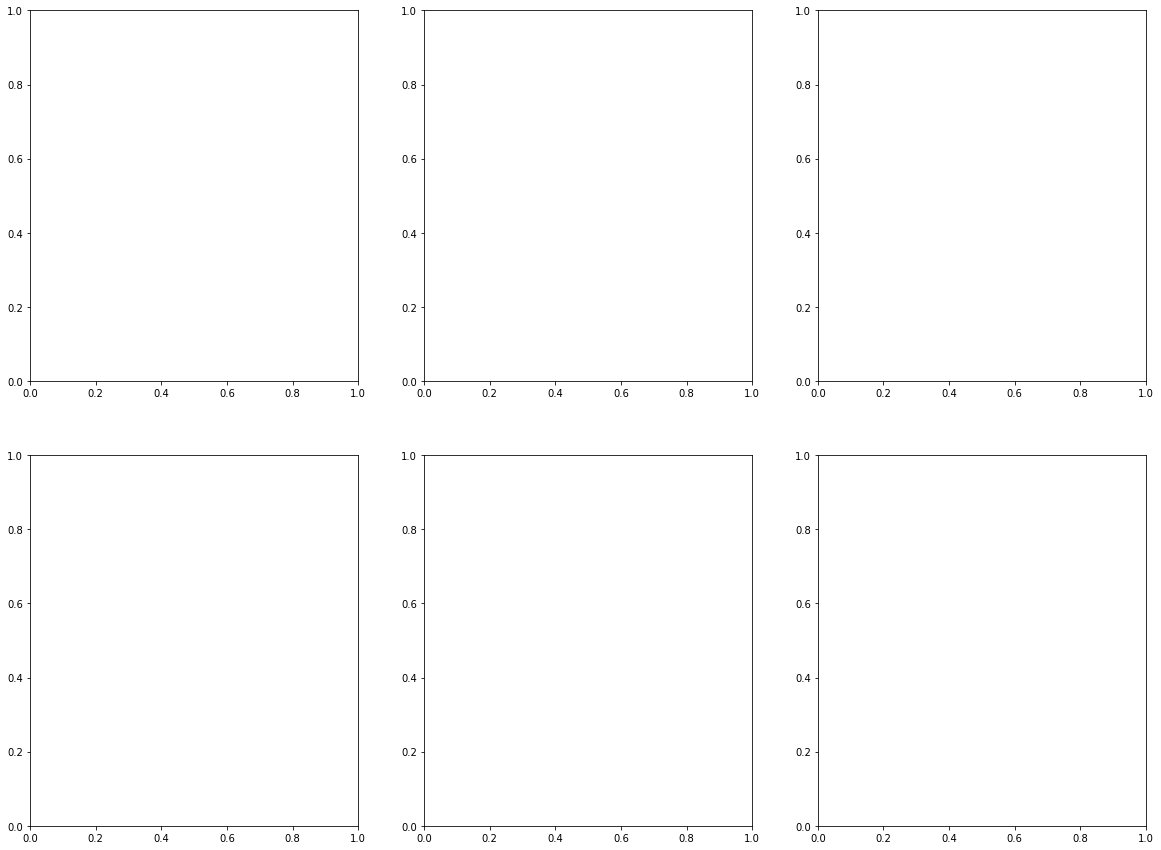

In [11]:
compare_results=em.evaluate_metrics(results)
compare_results.compare_classification_metrics()

In [0]:
# Run metrics visualization for the three supervised learning models chosen
#evaluate(results)

### 7b. Model Training and Evaluation

####1.   Random Forest Classifier
#####2.   XGB Classifier



In [0]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV 
 
clf= RandomForestClassifier()

parameters = {'min_samples_leaf':[30,50,100,200,300], 'n_estimators':[100,500,1000,700],'max_features':["log2","sqrt","auto"]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5,average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimatorc
best_clf = grid_fit.best_estimator_
best_params=grid_fit.best_params_


# Make predictions using the unoptimized and the optimized model 
l=clf.fit(X_train, y_train)
predictions = l.predict(X_test)

#best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
print ("Best estimator parameters")
print (best_params)

In [0]:
'''from xgboost import XGBClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import fbeta_score,accuracy_score,f1_score
 
clf= XGBClassifier()

parameters = {'learning_rate':[.05,.1,.2,.3], 'max_depth':[6,7,8,9], 'min_child_weight':[1,2], 
              'gamma':[0], 'subsample':[1], 'colsample_bytree':[.3,.4,.5], 'n_estimators':[100,150]
             , 'reg_lambda':[1]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=.5,average='weighted')

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)


# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimatorc
best_clf = grid_fit.best_estimator_
best_params=grid_fit.best_params_


# Make predictions using the unoptimized and the optimized model 
l=clf.fit(X_train, y_train)
predictions = l.predict(X_test)
#best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5,average='weighted')))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
print ("Best estimator parameters")
print (best_params)'''

In [0]:
'''import xgboost as xgb
def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train_d, Y_train_d, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,   max_evals=10,trials=trials)
best_model = getBestModelfromTrials(trials)'''

In [0]:
'''import lightgbm as lgb
def objective(params):
    params = {
        'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = lgbm.LGBMRegressor(
        n_estimators=500,
        learning_rate=0.01,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
}


trials = Trials()
best = fmin(fn=objective, space=space,algo=tpe.suggest,   max_evals=10,trials=trials)
best_model = getBestModelfromTrials(trials)
print("Hyperopt estimated optimum {}".format(best))

print("Hyperopt estimated optimum {}".format(best))'''

### 8. Predicted Cumulative Retention Curve 2019

In [0]:
predictions = l.predict(test_features_2019)
#best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(test_target_2019, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(test_target_2019, predictions, beta = 0.5,average='weighted')))
test_features_2019['PREDICTED_MAX_BILLING_CYCLE']=predictions

In [0]:
best_predictions = best_clf.predict(test_features_2019)
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(test_target_2019, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,average='weighted')))
test_features_2019['PREDICTED_MAX_BILLING_CYCLE']=best_predictions

In [0]:
def billing_cycle(members,cycle,max_billing_cycle):
    if cycle <= max_billing_cycle:
        return members
    else:
        return 0

test_features_2019['START_DATE'] = test_set_2019['START_DATE']
test_features_2019['PREDICTED_BILLING_CYCLE_1'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,1, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_2'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,2, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_3'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,3, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_4'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,4, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_5'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,5, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_6'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,6, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_7'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,7, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_8'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,8, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_9'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,9, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_10'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,10, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_11'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,11, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019['PREDICTED_BILLING_CYCLE_12'] = test_features_2019.apply(lambda x: billing_cycle(x.MEMBERS,12, x.PREDICTED_MAX_BILLING_CYCLE), axis=1)
test_features_2019.head()

In [0]:
def aggfunc(x):
    data = {'MRR_CYCLE_1':100.0,
            'MRR_CYCLE_2': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_2)))/(sum(x.PREDICTED_BILLING_CYCLE_1)),
            'MRR_CYCLE_3': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_3)))/(sum(x.PREDICTED_BILLING_CYCLE_2)),
            'MRR_CYCLE_4': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_4)))/(sum(x.PREDICTED_BILLING_CYCLE_3)),
            'MRR_CYCLE_5': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_5)))/(sum(x.PREDICTED_BILLING_CYCLE_4)),
            'MRR_CYCLE_6': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_6)))/(sum(x.PREDICTED_BILLING_CYCLE_5)),
            'MRR_CYCLE_7': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_7)))/(sum(x.PREDICTED_BILLING_CYCLE_6)),
            'MRR_CYCLE_8': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_8)))/(sum(x.PREDICTED_BILLING_CYCLE_7)),
            'MRR_CYCLE_9': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_9)))/(sum(x.PREDICTED_BILLING_CYCLE_8)),
            'MRR_CYCLE_10': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_10)))/(sum(x.PREDICTED_BILLING_CYCLE_9)),
            'MRR_CYCLE_11': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_11)))/(sum(x.PREDICTED_BILLING_CYCLE_10)),
            'MRR_CYCLE_12': (100.0*(sum(x.PREDICTED_BILLING_CYCLE_12)))/(sum(x.PREDICTED_BILLING_CYCLE_11))}

    return pd.Series(data)

d = test_features_2019.groupby('START_DATE').apply(aggfunc).reset_index()

In [0]:
pd.options.mode.chained_assignment = None
d['CMRR_CYCLE_1']=100.0
d['CMRR_CYCLE_2']=(d['CMRR_CYCLE_1']*d['MRR_CYCLE_2'])/100
d['CMRR_CYCLE_3']=(d['CMRR_CYCLE_2']*d['MRR_CYCLE_3'])/100
d['CMRR_CYCLE_4']=(d['CMRR_CYCLE_3']*d['MRR_CYCLE_4'])/100
d['CMRR_CYCLE_5']=(d['CMRR_CYCLE_4']*d['MRR_CYCLE_5'])/100
d['CMRR_CYCLE_6']=(d['CMRR_CYCLE_5']*d['MRR_CYCLE_6'])/100
d['CMRR_CYCLE_7']=(d['CMRR_CYCLE_6']*d['MRR_CYCLE_7'])/100
d['CMRR_CYCLE_8']=(d['CMRR_CYCLE_7']*d['MRR_CYCLE_8'])/100
d['CMRR_CYCLE_9']=(d['CMRR_CYCLE_8']*d['MRR_CYCLE_9'])/100
d['CMRR_CYCLE_10']=(d['CMRR_CYCLE_9']*d['MRR_CYCLE_10'])/100
d['CMRR_CYCLE_11']=(d['CMRR_CYCLE_10']*d['MRR_CYCLE_11'])/100
d['CMRR_CYCLE_12']=(d['CMRR_CYCLE_11']*d['MRR_CYCLE_12'])/100


cumulative=d[['START_DATE','CMRR_CYCLE_1','CMRR_CYCLE_2','CMRR_CYCLE_3','CMRR_CYCLE_4','CMRR_CYCLE_5','CMRR_CYCLE_6','CMRR_CYCLE_7','CMRR_CYCLE_8','CMRR_CYCLE_9','CMRR_CYCLE_10','CMRR_CYCLE_11','CMRR_CYCLE_12']]
cumulative

In [0]:
cumulative_melt=pd.melt(cumulative,id_vars="START_DATE",var_name='BILLING_CYCLE',value_name='PREDICTED_CUMULATIVE_RETENTION_RATE')
cumulative_melt['BILLING_CYCLE']=cumulative_melt['BILLING_CYCLE'].str[11:].astype(int)

timeseries="BILLING_CYCLE"
x="COHORT"
value="PREDICTED_CUMULATIVE_RETENTION_RATE"
#df_d=df_group.groupby([timeseries,x], as_index=False)[value].agg({'group_size':'sum'})
plt.figure(figsize=(20,10))
sns.lineplot(x="BILLING_CYCLE", y="PREDICTED_CUMULATIVE_RETENTION_RATE", hue="START_DATE",
                  data=cumulative_melt)
plt.legend(loc="upper right", bbox_to_anchor=(1.2,1.0))
plt.title("Predicted Cumulative Retention Rate by " + timeseries + " and " + x)
plt.show()

In [0]:
#HYPEROPT FOR LGBM
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from timeit import default_timer as timer
import lightgbm as lgb

MAX_EVALS = 50
N_FOLDS = 10
ITERATION = 0
# Define the search space
space = {
    'class_weight': hp.choice('class_weight', [None, 'balanced']),
    'boosting_type': hp.choice('boosting_type', [{'boosting_type': 'gbdt', 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}, 
                                                 {'boosting_type': 'dart', 'subsample': hp.uniform('dart_subsample', 0.5, 1)},
                                                 {'boosting_type': 'goss', 'subsample': 1.0}]),
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'min_child_samples': hp.quniform('min_child_samples', 20, 500, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'colsample_bytree': hp.uniform('colsample_by_tree', 0.6, 1.0)
}


def objective(params, n_folds = N_FOLDS):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    print ('Params testing: ', params)
    # Keep track of evals
    global ITERATION
    
    ITERATION += 1
    
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_child_samples']:
        params[parameter_name] = int(params[parameter_name])
    
    start = timer()
    
    # Perform n_folds cross validation
    train_set = lgb.Dataset(X_train, y_train)
    cv_results = lgb.cv(params, train_set, num_boost_round = 10000, nfold = n_folds, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 50)
    
    run_time = timer() - start
    
    # Extract the best score
    best_score = np.max(cv_results['auc-mean'])
    
    # Loss must be minimized
    loss = 1 - best_score
    
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['auc-mean']) + 1)

    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, ITERATION, n_estimators, run_time])
    
    pred_auc =model.predict_proba(X_test, batch_size = 128, verbose = 0)
    acc = roc_auc_score(y_test, pred_auc)
    print('AUC:', acc)
    sys.stdout.flush() 
   
    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'iteration': ITERATION,
            'estimators': n_estimators, 
            'train_time': run_time, 'status': STATUS_OK}

bayes_trials = Trials()
best = fmin(fn=objective,  space=space,  algo=tpe.suggest, max_evals=MAX_EVALS,trials = bayes_trials)

print("Hyperopt estimated optimum {}".format(best))